# Import modules

In [1]:
from msi_workflow import get_project

import logging
import time

logging.basicConfig(level=logging.INFO)  # get some info during runtime
time0 = time.time()

%matplotlib inline

 # Set some parameters

In [2]:
path_folder = r'C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i'
# depth_span = (535, 540)
depth_span = (int(path_folder.split('-', 1)[0][-3:]), int(path_folder.split('-', 1)[1][:3]))
print(depth_span)

(490, 495)


# Set the age model (combination of two shorter ones)

In [3]:
from msi_workflow import AgeModel

path_age_model_480_510 = r'C:/Users/Yannick Zander/Promotion/Cariaco MSI 2024/Age Model/480-510/480_510_MSI_age_model_mm_yr.txt'
path_age_model_510_540 = r'C:/Users/Yannick Zander/Promotion/Cariaco MSI 2024/Age Model/510-540/510_540_MSI_age_model_mm_yr.txt'

age_model_480_510 = AgeModel(path_file=path_age_model_480_510, depth_offset=4800, conversion_to_cm=1 / 10, sep='\t',
                             index_col=False)
age_model_510_540 = AgeModel(path_file=path_age_model_510_540, depth_offset=5100, conversion_to_cm=1 / 10, sep='\t',
                             index_col=False)

age_model = age_model_480_510 + age_model_510_540

dict_keys(['save_file', 'path_folder', '_in_file', 'column_depth', 'column_age', 'df'])
dict_keys(['save_file', 'path_folder', '_in_file', 'column_depth', 'column_age', 'df'])


In [4]:
age_model

           depth      age
0     480.089992  11194.2
1     480.099992  11194.4
2     480.109991  11194.6
3     480.119990  11194.8
4     480.129989  11195.0
...          ...      ...
5949  539.926400  11930.6
5950  539.936400  11930.7
5951  539.946400  11930.7
5952  539.956400  11930.8
5953  539.966400  11930.9

[5954 rows x 2 columns]

# Initialize the project

In [5]:
p = get_project(is_MSI=True, path_folder=path_folder)

mis_file and d_folder should match the desired files (in case there are multiple inside the folder), if not, provide them as keyword arguments! The measurement name is infered from the folder name but is only relevant if multiple exports are found in the folder. If a project was created earlier for this measurement, additional files such as SampleImageHanderXRF_file will show up as well

In [6]:
p.__dict__

{'path_folder': 'C:\\Users\\Yannick Zander\\Promotion\\Cariaco MSI 2024\\490-495cm\\2018_08_27 Cariaco 490-495 alkenones.i',
 'd_folder': '2018_08_27 Cariaco 490-495 alkenones.d',
 'mis_file': '2018_08_27 Cariaco 490-495 alkenones.mis',
 'AgeModel_file': 'AgeModel.pickle',
 'peaks_file': 'peaks.sqlite',
 'Spectra_file': 'Spectra.hdf5',
 'ImageClassified_file': 'ImageClassified.pickle',
 'ImageROI_file': 'ImageROI.pickle',
 'ImageSample_file': 'ImageSample.pickle',
 'SampleImageHandlerMSI_file': 'SampleImageHandlerMSI.pickle',
 '_is_laminated': True}

set depth and age interval

In [7]:
p.set_depth_span(depth_span)
p.age_model = age_model
p.set_age_span()

print(f'depth span: {p.depth_span} cm')
print(f' age span: {p.age_span} kyrs b2k')

depth span: (490, 495) cm
 age span: (11393.916733067728, 11495.626) kyrs b2k


# set the images

INFO:msi_workflow.project.main:loading SampleHandler from C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i
INFO:msi_workflow.msi_workflow.util.convinience:loaded SampleImageHandlerMSI with keys {'_extent_spots', '_photo_roi_xywh', 'd_folder', '_data_roi_xywh', 'mis_file', 'image_file'}


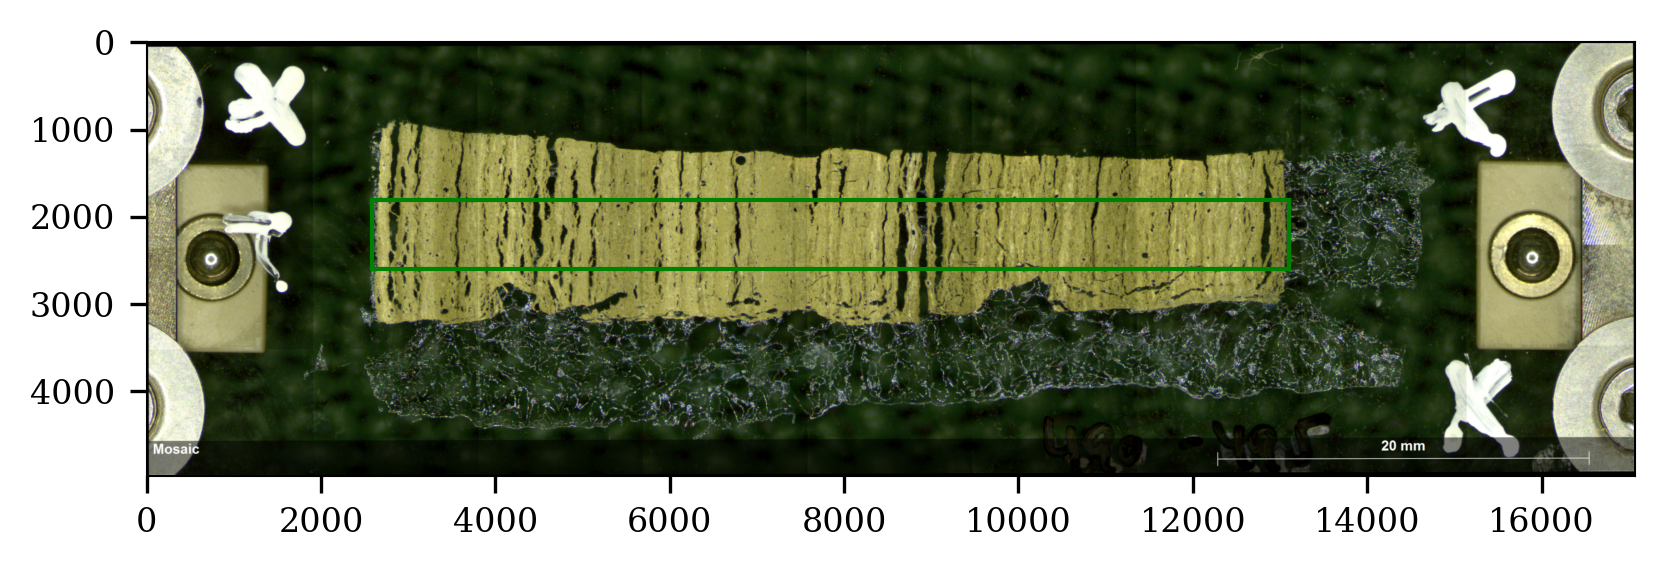

In [8]:
p.require_image_handler()
p.image_handler.plot_overview()

# set image sample object
if the obj color is not identified correctly, specify it (foreground pixels should be white) \n
if the roi is not detected correctly, call the function again with overwrite=True and interactive=True

In [9]:
_ = p.require_image_sample(obj_color='light', overwrite=False)
#p.set_image_sample(obj_color='light', overwrite=True, interactive=True)

INFO:msi_workflow.project.main:loading ImageSample
INFO:msi_workflow.msi_workflow.util.convinience:loaded ImageSample with keys {'_xywh_ROI', 'obj_color', '_hw'}


INFO:msi_workflow.imaging.util.image_helpers:Determining threshold for background intensity with OTSU.
INFO:msi_workflow.msi_workflow.imaging.main:searching optimal parameters for box
INFO:msi_workflow.msi_workflow.imaging.main:found box with [6.16079231e-01 4.17000000e-01 1.57540179e+03 4.39365425e+02]
INFO:msi_workflow.msi_workflow.imaging.main:solver converged: True
INFO:msi_workflow.imaging.util.image_helpers:Determining threshold for background intensity with OTSU.


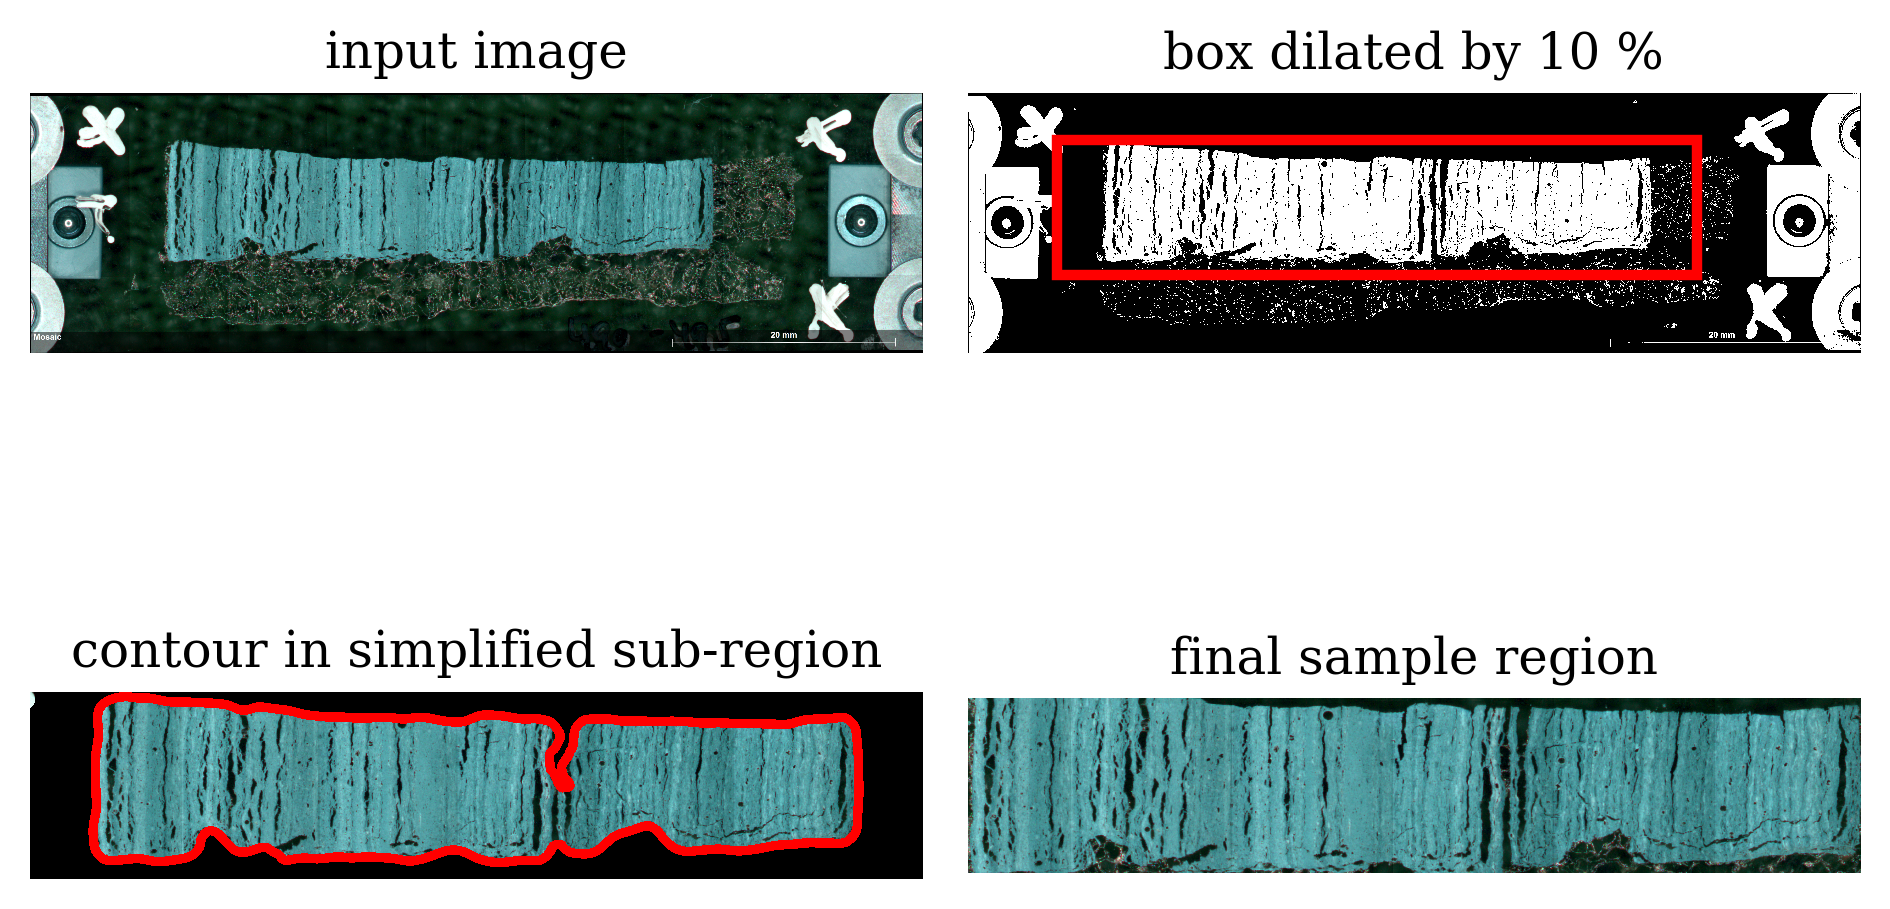

In [10]:
p.image_sample.plot_overview()

# set the ROI object
(uses the final sample region from the previous plot)

In [11]:
p.require_image_roi(overwrite=False)
# p.image_roi.set_punchholes(side='bottom')
# p.image_roi.set_punchholes(interactive=True)
p.image_roi.save()  # save changes

INFO:msi_workflow.project.main:loading ImageROI
INFO:msi_workflow.msi_workflow.util.convinience:loaded ImageROI with keys {'age_span', '_punchhole_size', '_params', '_hw', '_image_original', '_image_classification', 'obj_color', '_punchholes'}
INFO:msi_workflow.msi_workflow.util.convinience:saving image object with dict_keys(['obj_color', '_hw', '_image_original', '_image', 'path_folder', 'age_span', '_punchhole_size', '_params', '_image_classification', '_punchholes']) to C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i


INFO:msi_workflow.msi_workflow.imaging.main:Estimating kernel size from age model (square with 2x expected thickness of one year).
INFO:msi_workflow.imaging.util.image_helpers:Determining threshold for background intensity with OTSU.


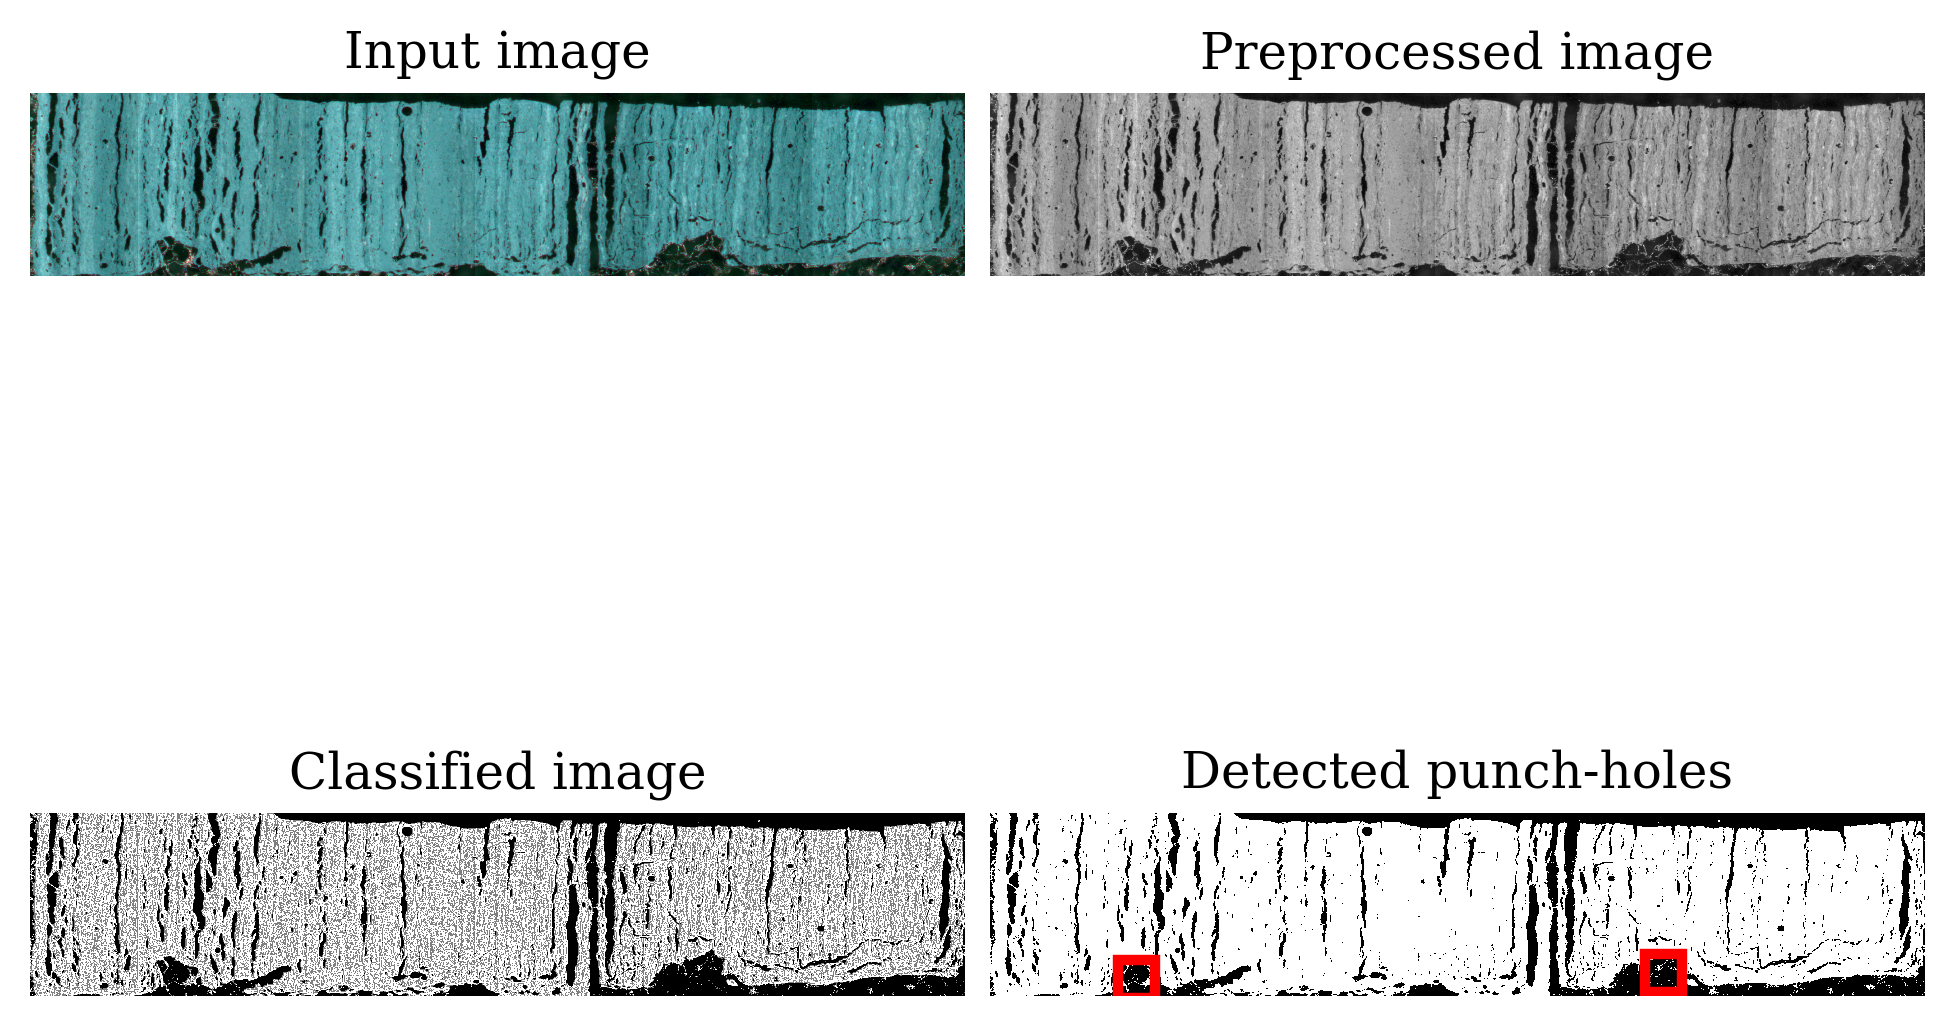

In [12]:
p.image_roi.plot_overview()

# set the classified image

In [13]:
_ = p.require_image_classified(overwrite=False)  # supress printing

INFO:msi_workflow.project.main:loading ImageClassified ...
INFO:msi_workflow.msi_workflow.util.convinience:loaded ImageClassified with keys {'age_span', '_hw', 'params_laminae_simplified', 'image_seeds', '_image_original', '_image_classification', 'obj_color'}


INFO:msi_workflow.msi_workflow.imaging.main:loading tilt correction transformation
INFO:msi_workflow.msi_workflow.util.convinience:loaded Mapper with keys {'_image_shape', '_tag', '_Vs', '_Us'}
setting unique values: 100%|█████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 26.25it/s]


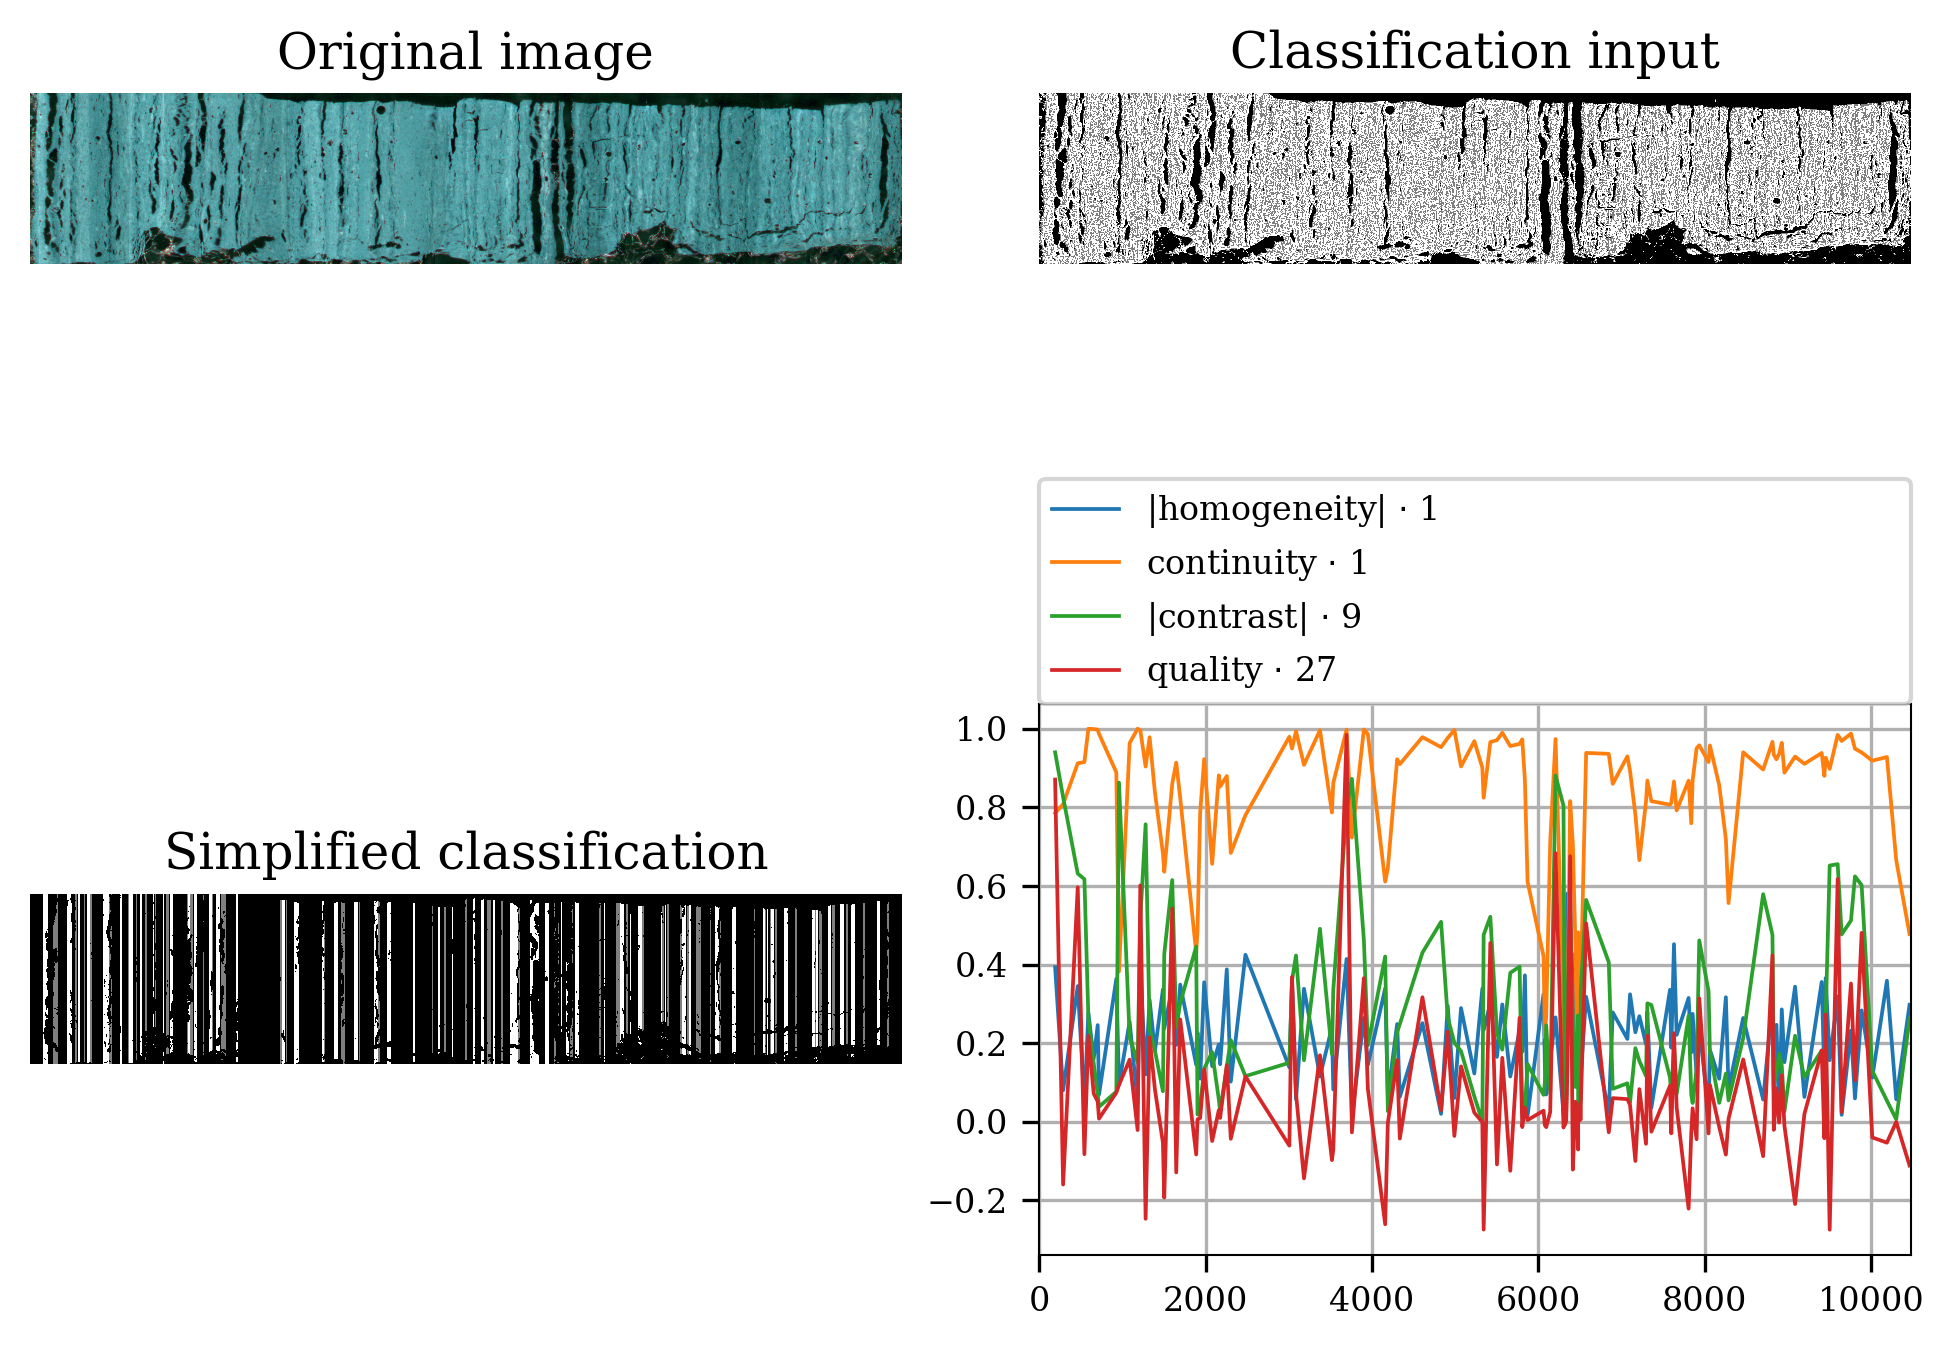

In [14]:
p.image_classified.plot_overview()

In [15]:
p.image_classified.params_laminae_simplified

seed    a    b    c         d      height  success  color      width  \
0      192  0.0  0.0  0.0 -0.007331  122.867074    False  light  65.462274   
1      288  0.0  0.0  0.0  0.020416  115.876697     True   dark  83.623666   
2      464  0.0  0.0  0.0  0.007957  128.259407     True  light  91.878012   
3      544  0.0  0.0  0.0  0.005120   45.946186     True   dark  22.973093   
4      592  0.0  0.0  0.0 -0.006362   52.113579     True  light  26.056789   
..     ...  ...  ...  ...       ...         ...      ...    ...        ...   
122   9888  0.0  0.0  0.0 -0.000092   96.752547     True  light  58.909414   
123  10016  0.0  0.0  0.0  0.007792   64.461219     True   dark  34.291492   
124  10192  0.0  0.0  0.0  0.007841   64.001456     True  light  32.751148   
125  10304  0.0  0.0  0.0  0.005670   46.445974     True   dark  23.222987   
126  10464  0.0  0.0  0.0  0.000000    7.699250     True  light   7.699250   

     prominence  homogeneity  continuity  brightness  contrast   quality  
0      0.151942     0.393089    0.785515    0.629136  0.104444  0.032250  
1      0.151942     0.079825    0.807928    0.510144 -0.091809 -0.005921  
2      0.243799     0.345237    0.912154    0.597434  0.070153  0.022092  
3      0.162352     0.048802    0.915132    0.528066 -0.068595 -0.003063  
4      0.120556     0.276879    1.000000    0.614261  0.029237  0.008095  
..          ...          ...         ...         ...       ...       ...  
122    0.127346     0.283170    0.939739    0.617779  0.066881  0.017797  
123    0.127346     0.112202    0.918771    0.545587 -0.014408 -0.001485  
124    0.151563     0.358700    0.928103    0.505297 -0.005939 -0.001977  
125    0.139390     0.057004    0.665543    0.477084 -0.000671 -0.000025  
126    0.111569     0.297505    0.477471    0.450152 -0.029045 -0.004126  

[127 rows x 15 columns]

In [16]:
colors = p.image_classified.params_laminae_simplified.color
print(f'found {sum(colors == "light")} light and {sum(colors == "dark")} laminae')
print(f'whereas the age model predicts {round(p.age_span[1] - p.age_span[0])}')

found 64 light and 63 laminae
whereas the age model predicts 102


# set a spectra object

In [17]:
_ = p.require_spectra(plts=True, overwrite=False)  # supress printing

INFO:msi_workflow.msi_workflow.util.convinience:loaded Spectra with keys {'_mzs', '_line_spectra', '_peaks', '_intensities', '_indices', '_peaks_SNR', '_delta_mz', '_peaks_is_side_peak', '_calibration_parameters', '_noise_level', '_calibration_settings', 'd_folder', '_kernel_params', '_binning_by', '_kernel_shape', '_noise_level_subtracted', '_feature_table', '_peak_properties', '_tic', '_peak_setting_parameters', '_limits'}
INFO:msi_workflow.project.main:loaded fully initialized spectra object


# set measurement
by default, this object also has information about the photo

In [18]:
_= p.require_data_object(overwrite=False)

INFO:msi_workflow.data.msi:reading pixel distance from C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i\2018_08_27 Cariaco 490-495 alkenones.mis


In [19]:
p.data_object.feature_table

548.0708      548.0768  548.0924      548.1308      548.1515  548.1608  \
0           0.0      0.000000       0.0      0.000000      0.000000       0.0   
1           0.0      0.000000       0.0      0.000000      0.000000       0.0   
2           0.0      0.000000       0.0      0.000000      0.000000       0.0   
3           0.0      0.000000       0.0      0.000000      0.000000       0.0   
4           0.0      0.000000       0.0      0.000000      0.000000       0.0   
...         ...           ...       ...           ...           ...       ...   
17113       0.0  38960.286229       0.0  81915.473449  78771.948093       0.0   
17114       0.0  46046.042535       0.0      0.000000      0.000000       0.0   
17115       0.0      0.000000       0.0      0.000000  58635.649111       0.0   
17116       0.0      0.000000       0.0      0.000000      0.000000       0.0   
17117       0.0      0.000000       0.0      0.000000      0.000000       0.0   

       548.1776       548.1872       548.2066       548.2138  ...  \
0           0.0       0.000000       0.000000       0.000000  ...   
1           0.0       0.000000       0.000000       0.000000  ...   
2           0.0       0.000000       0.000000       0.000000  ...   
3           0.0  109699.170027       0.000000  120538.164893  ...   
4           0.0   87354.238282       0.000000  120043.345484  ...   
...         ...            ...            ...            ...  ...   
17113       0.0  373854.298672  192107.440941  350866.279327  ...   
17114       0.0  398639.694611  264337.244953  370414.247074  ...   
17115       0.0  188448.633074  167670.760270  290543.559029  ...   
17116       0.0  178961.299482  117548.505520  204886.947646  ...   
17117       0.0       0.000000       0.000000       0.000000  ...   

            559.398      559.4133  559.4342  559.4492      559.4703  \
0          0.000000      0.000000       0.0       0.0      0.000000   
1          0.000000      0.000000       0.0       0.0  20796.789137   
2          0.000000      0.000000       0.0       0.0      0.000000   
3          0.000000      0.000000       0.0       0.0      0.000000   
4          0.000000      0.000000       0.0       0.0      0.000000   
...             ...           ...       ...       ...           ...   
17113  28058.582328      0.000000       0.0       0.0  26715.953186   
17114  23566.482698  27009.560857       0.0       0.0      0.000000   
17115      0.000000      0.000000       0.0       0.0      0.000000   
17116      0.000000      0.000000       0.0       0.0      0.000000   
17117      0.000000      0.000000       0.0       0.0      0.000000   

           559.4992      559.5432  R    x    y  
0          0.000000      0.000000  0  121   85  
1          0.000000      0.000000  0  122   85  
2      33970.365267      0.000000  0  123   85  
3          0.000000      0.000000  0  124   85  
4          0.000000      0.000000  0  125   85  
...             ...           ... ..  ...  ...  
17113  23210.132598  18312.924662  0  608  121  
17114      0.000000      0.000000  0  609  121  
17115  30402.491993      0.000000  0  610  121  
17116      0.000000      0.000000  0  611  121  
17117      0.000000      0.000000  0  612  121  

[17118 rows x 468 columns]

# add image related attributes to the data table

In [20]:
p.add_pixels_ROI()
p.add_photo()
p.add_holes()
p.add_depth_column(exclude_gaps=True)
p.add_age_column()
p.add_light_dark_classification()
p.add_laminae_classification()

INFO:msi_workflow.imaging.util.image_helpers:Determining threshold for background intensity with OTSU.


INFO:msi_workflow.data.helpers:clipping values to 95% percentile
INFO:msi_workflow.data.helpers:clipping values to 0% percentile


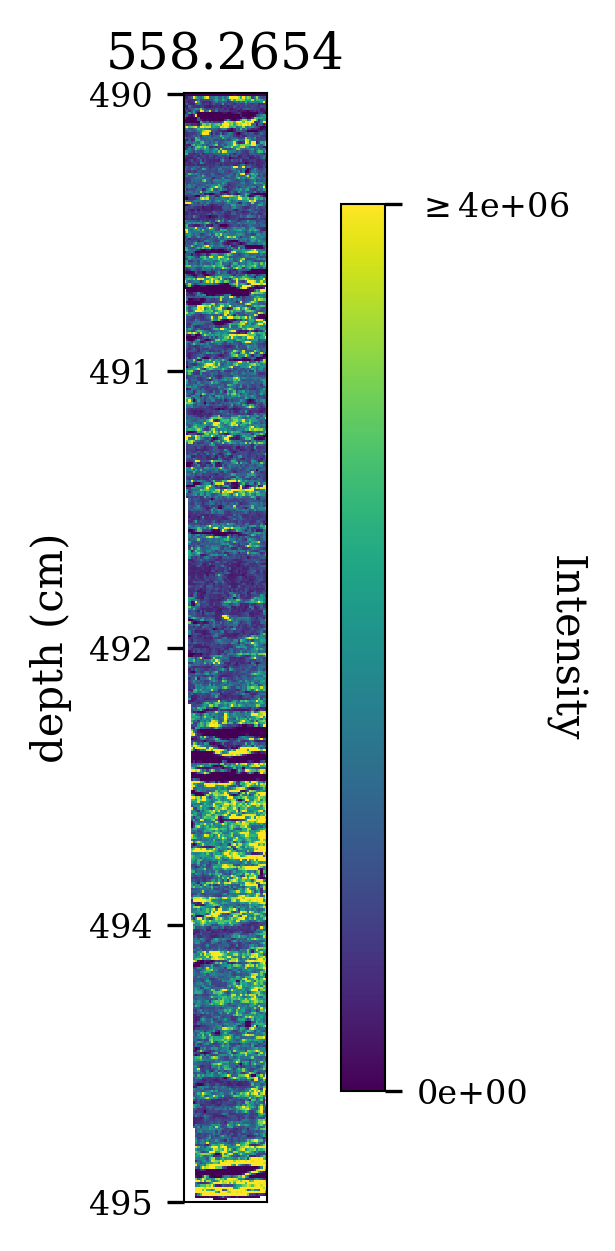

INFO:msi_workflow.data.helpers:clipping values to 95% percentile
INFO:msi_workflow.data.helpers:clipping values to 0% percentile


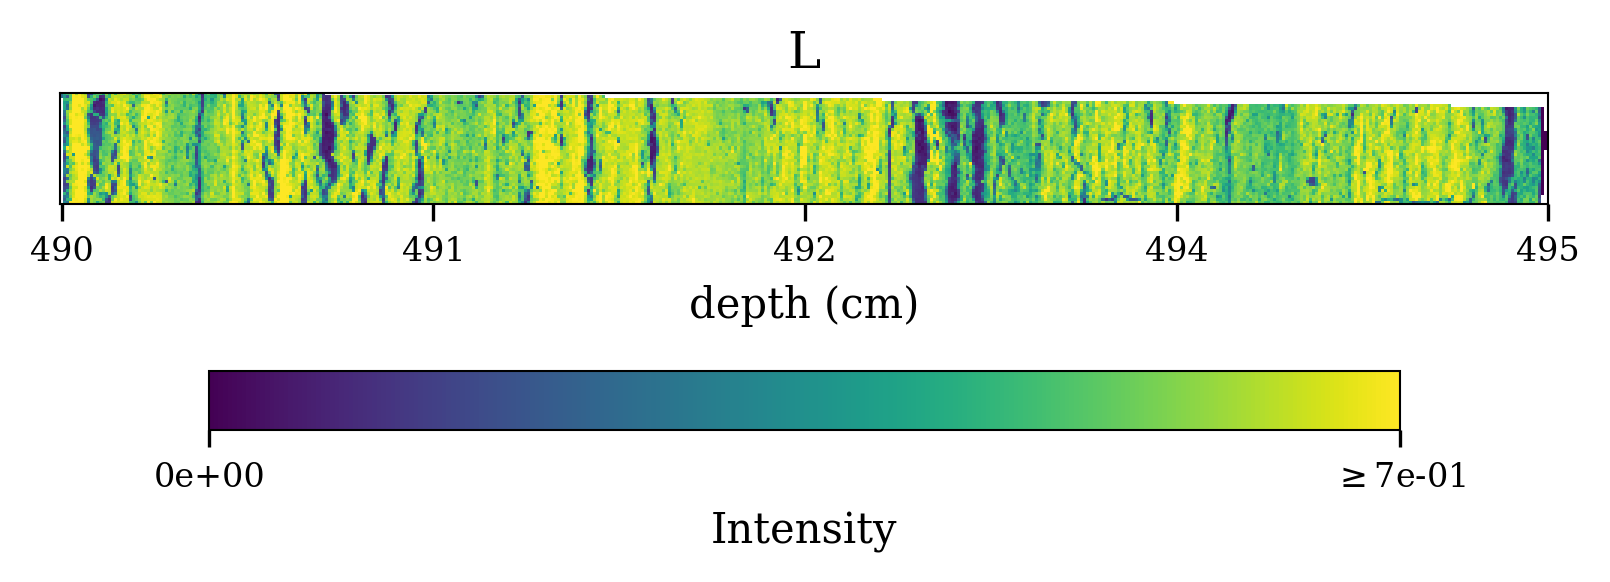

INFO:msi_workflow.data.helpers:clipping values to 95% percentile
INFO:msi_workflow.data.helpers:clipping values to 0% percentile


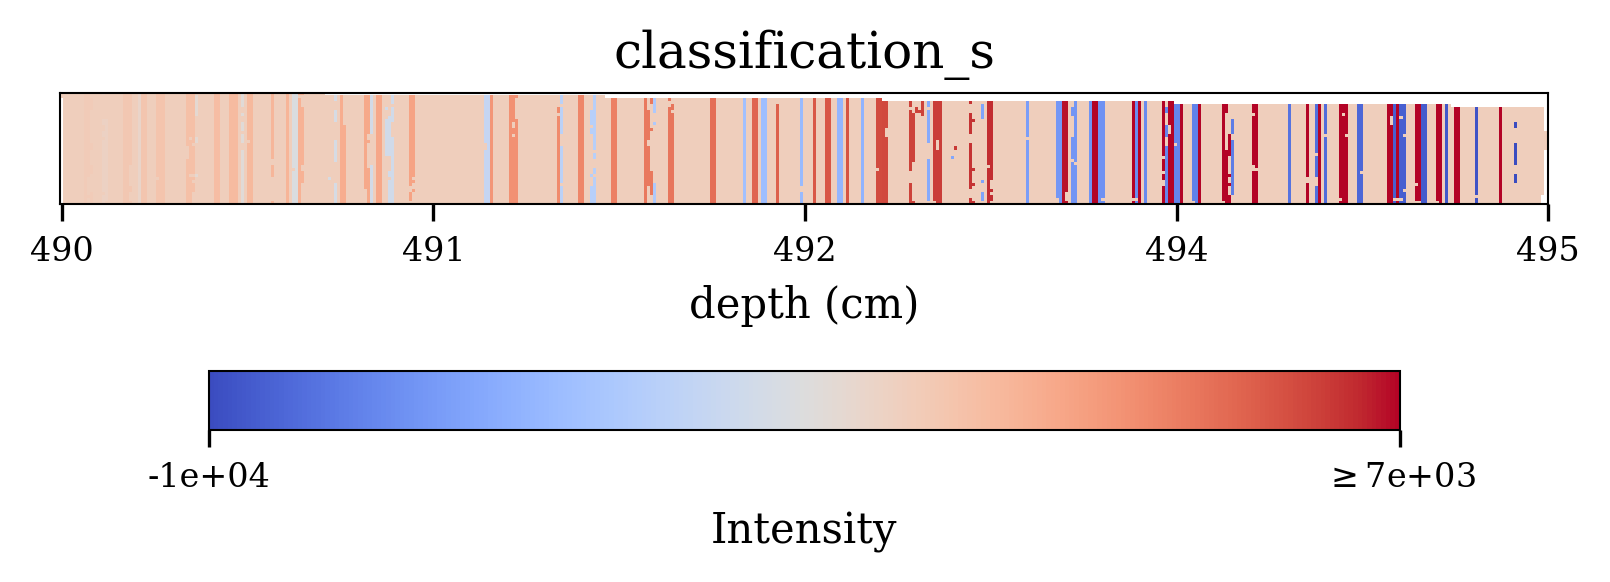

INFO:msi_workflow.data.helpers:clipping values to 95% percentile
INFO:msi_workflow.data.helpers:clipping values to 0% percentile


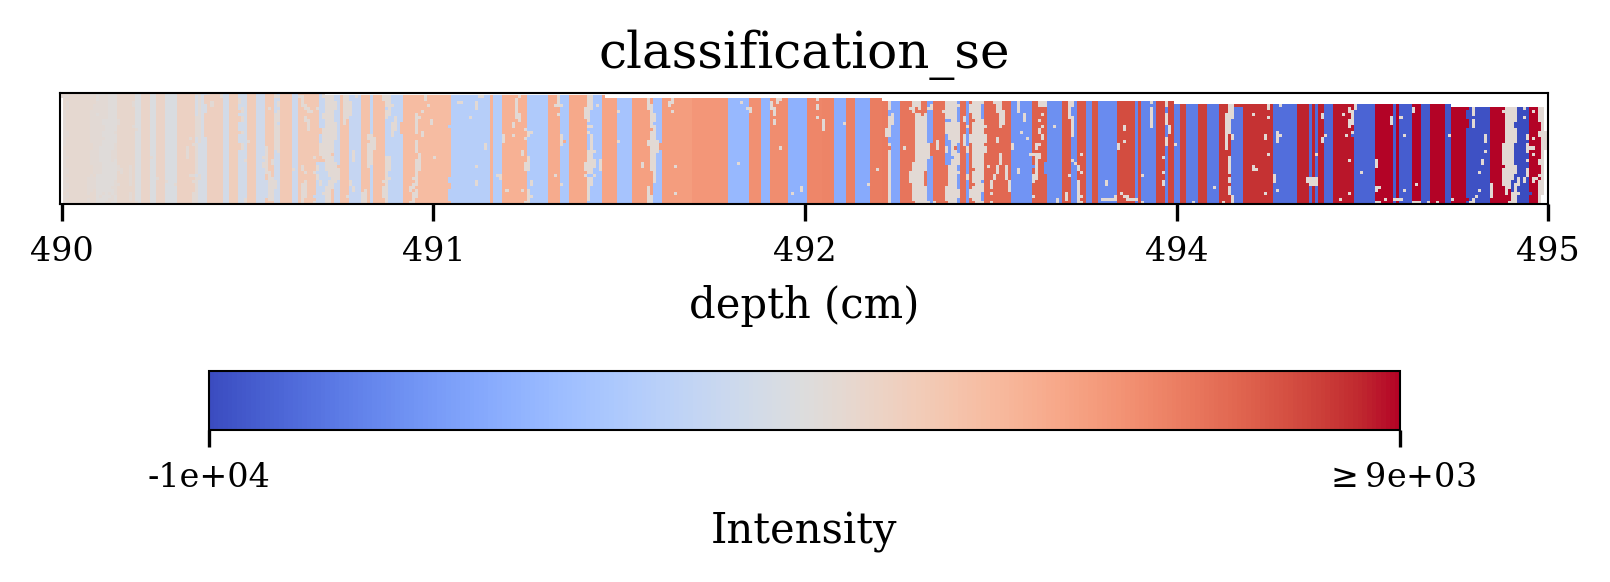

In [28]:
comp_max = p.data_object.data_columns[p.data_object.data_mean.argmax()]
p.data_object.plot_comp(comp_max, flip=True)
p.data_object.plot_comp("L")
p.data_object.plot_comp('classification_s', cmap='coolwarm')
p.data_object.plot_comp('classification_se', cmap='coolwarm')

In [22]:
p.data_object.feature_table.columns

Index(['548.0708', '548.0768', '548.0924', '548.1308', '548.1515', '548.1608',
       '548.1776', '548.1872', '548.2066', '548.2138',
       ...
       'y', 'x_ROI', 'y_ROI', 'L', 'valid', 'depth', 'age', 'classification',
       'classification_s', 'classification_se'],
      dtype='object', length=477)

In [23]:
p.data_object.feature_table.depth

0        490.000000
1        490.000000
2        490.010246
3        490.020492
4        490.030738
            ...    
17113    494.959016
17114    494.969262
17115    494.979508
17116    494.989754
17117    495.000000
Name: depth, Length: 17118, dtype: float64

# set time series based on laminae classification

In [24]:
_ = p.require_time_series(average_by_col='classification_se', overwrite=False)

averaging values for zones: 100%|███████████████████████████████████████████████████| 118/118 [00:00<00:00, 546.93it/s]
INFO:msi_workflow.msi_workflow.timeSeries.time_series:detected d-folder
INFO:msi_workflow.msi_workflow.util.convinience:saving image object with dict_keys(['n_successes_required', 'd_folder', 'path_folder', 'feature_table', 'feature_table_successes', 'feature_table_standard_deviations']) to C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i\2018_08_27 Cariaco 490-495 alkenones.d


In [25]:
p.time_series.feature_table

seed      548.0708      548.0768      548.0924      548.1308  \
58     192   1115.284705   1044.896904   3860.796839   2725.569335   
56    -288   3836.786816   7413.946132  12084.223500  15684.551975   
59     464   4112.999814   6475.030909  10905.021037  10835.071296   
55    -544   4230.369604   9075.084429   9827.063464  19492.766964   
60     592   1178.856348   1533.664192    895.296271   2119.898584   
..     ...           ...           ...           ...           ...   
115   9888   2988.955329   3923.708519   5323.959694   6334.130066   
1   -10016   6484.556275   9219.758639  14869.860114  22634.561874   
116  10192  11375.813440  14957.210462  30286.545978  37674.230380   
0   -10304   7576.116356  10977.459104  18870.227202  19617.693017   
117  10464  12645.291541  15400.705419  39012.667925  42367.515138   

         548.1515      548.1608      548.1776       548.1872       548.2066  \
58    3813.314660   3771.772161  11509.441709   92382.900680   31345.669427   
56   18453.129264  13041.143958  28102.617001  178830.367272   74415.915238   
59    6715.654244   8012.087793  13790.082820  191648.233979   66824.355652   
55   10656.070418   9249.458777  19235.332797  173256.561985   70814.574092   
60    3350.009154   1292.039774   2668.757357   91334.498841   10284.016298   
..            ...           ...           ...            ...            ...   
115   3994.993626   5607.461762   8109.897881  159610.268722   33496.939449   
1    17489.024301  15980.114747  30529.513459  251665.162532  104083.888168   
116  29975.023182  27613.492442  55989.002740  352461.866607  167720.159184   
0    36154.380488  21313.380670  36168.950744  219633.761342  120822.641790   
117  54926.718114  31883.968422  57782.503013  378780.953591  234447.723556   

     ...         x_ROI    R         L       depth           x  homogeneity  \
58   ...    124.480132  0.0  0.618959  490.049533  126.834437     0.393089   
56   ...    329.368421  0.0  0.531139  490.147936  136.438596     0.079825   
59   ...    457.915842  0.0  0.590769  490.209686  142.465347     0.345237   
55   ...    544.305556  0.0  0.549022  490.251167  146.513889     0.048802   
60   ...    597.333333  0.0  0.623235  490.276639  149.000000     0.276879   
..   ...           ...  ...       ...         ...         ...          ...   
115  ...   9898.597561  0.0  0.622380  494.724423  585.103659     0.283170   
1    ...  10036.703863  0.0  0.533638  494.790773  591.579399     0.112202   
116  ...  10174.641892  0.0  0.481783  494.857042  598.047297     0.358700   
0    ...  10346.507812  0.0  0.473089  494.939565  606.101562     0.057004   
117  ...  10435.732673  0.0  0.457431  494.982450  610.287129     0.297505   

     continuity  contrast   quality           age  
58     0.785515  0.104444  0.032250  11394.906663  
56     0.807928 -0.091809 -0.005921  11396.965093  
59     0.912154  0.070153  0.022092  11398.211719  
55     0.915132 -0.068595 -0.003063  11399.041338  
60     1.000000  0.029237  0.008095  11399.550787  
..          ...       ...       ...           ...  
115    0.939739  0.066881  0.017797  11490.012455  
1      0.918771 -0.014408 -0.001485  11491.339451  
116    0.928103 -0.005939 -0.001977  11492.664840  
0      0.665543 -0.000671 -0.000025  11494.417304  
117    0.477471 -0.029045 -0.004126  11495.275002  

[117 rows x 476 columns]

# look at a few examples

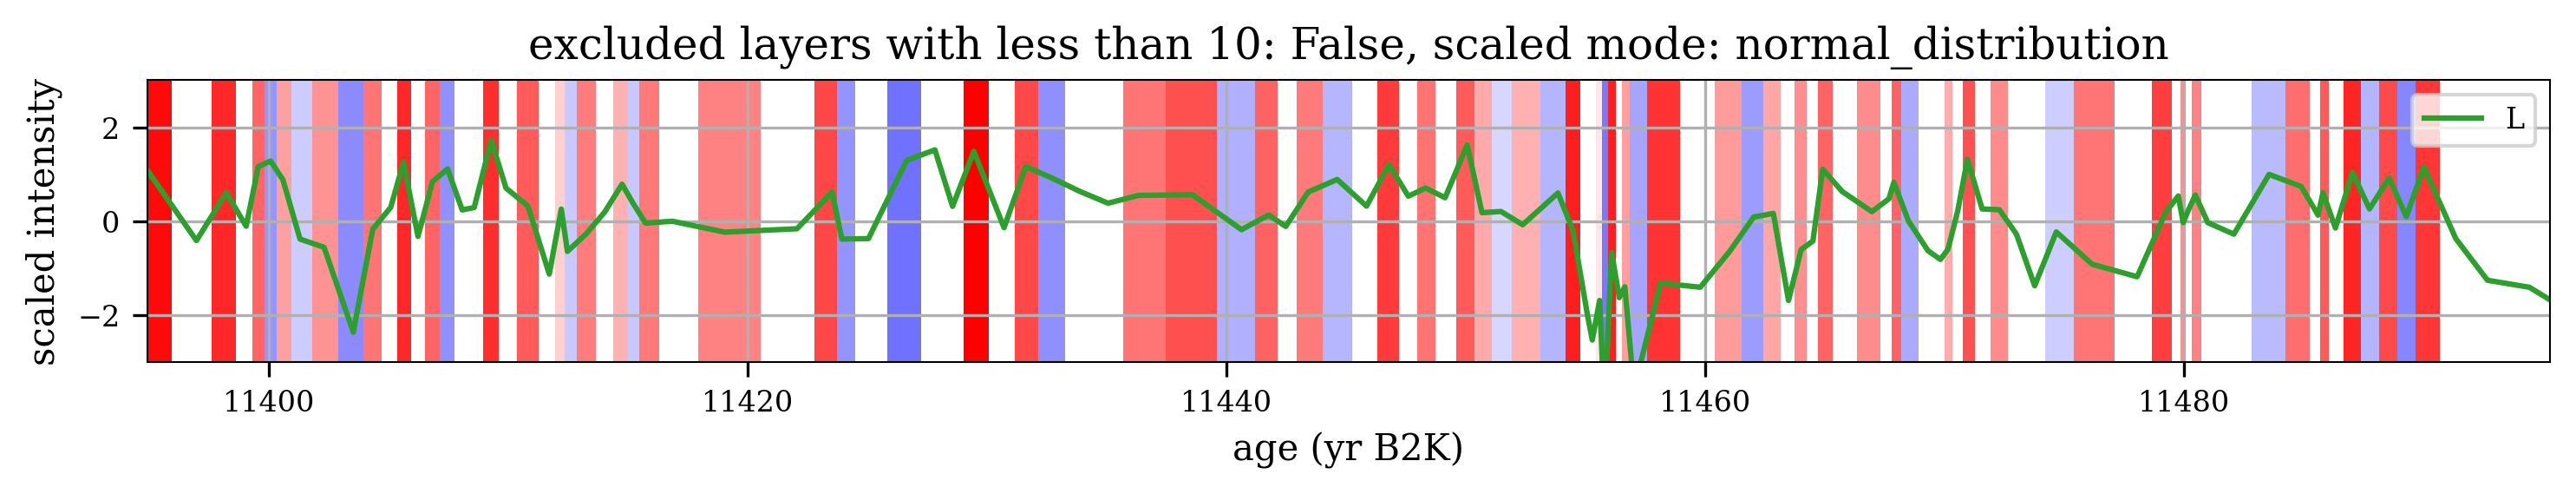

TypeError: 'Series' object is not callable

In [26]:
# from res.compound_masses import mC37_2

p.time_series.plot_comp('L', color_seasons=True)
# p.time_series.plot_comp(mC37_2, color_seasons=True)
comp_max = p.time_series.feature_table.columns[p.data_object.data_mean().argmax()]
p.time_series.plot_comp(comp_max, color_seasons=True)

In [ ]:
time1 = time.time()
print(f'processing took {(time1 - time0) / 60:.0f} minutes')